In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
women=cv2.imread('download.png',0)
cv2.imshow("Women",women)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def hist_plot(img):
    count=[]
    r=[]
    for k in range(0,256):
        c=0
        for i in range(women.shape[0]):
            for j in range(women.shape[1]):
                if(img[i][j]==k):
                    c+=1
        count.append(c)
        r.append(k)
    return r,count

In [6]:
import pandas as pd
r1,c1=hist_plot(women)
df=pd.DataFrame({'n':r1,'nk':c1})
df

,n,nk
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
251,251,0
252,252,0
253,253,0
254,254,0


In [10]:
df['pdf']=df['nk']/(256*256)
df.head

<bound method NDFrame.head of        n  nk  pdf    cdf  (l-1)cdf
0      0   0  0.0    NaN       NaN
1      1   0  0.0    0.0       0.0
2      2   0  0.0    0.0       0.0
3      3   0  0.0    0.0       0.0
4      4   0  0.0    0.0       0.0
..   ...  ..  ...    ...       ...
251  251   0  0.0  100.0     255.0
252  252   0  0.0  100.0     255.0
253  253   0  0.0  100.0     255.0
254  254   0  0.0  100.0     255.0
255  255   0  0.0  100.0     255.0

[256 rows x 5 columns]>

In [12]:
df['cdf']=(df.pdf.cumsum()/df.pdf.sum())*100
df['(l-1)cdf']=255*df.cdf/100
print(df.iloc[[155]])

       n   nk       pdf        cdf   (l-1)cdf
155  155  693  0.010574  78.155518  199.29657


In [13]:
output_img=np.zeros(women.shape)

In [15]:
for i in range(women.shape[0]):
    for j in range(women.shape[1]):
        r=women[i][j]
        output_img[i][j]=df.iloc[[r]]['(l-1)cdf']

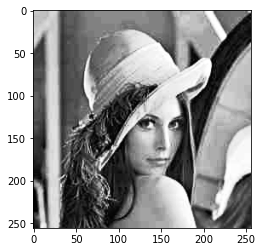

In [16]:
plt.imshow(output_img,cmap='gray')

<StemContainer object of 3 artists>

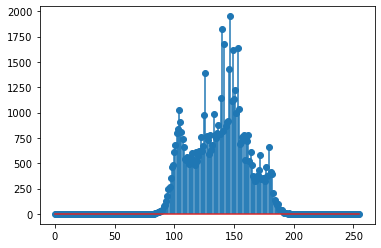

In [18]:
plt.stem(r1,c1)

<StemContainer object of 3 artists>

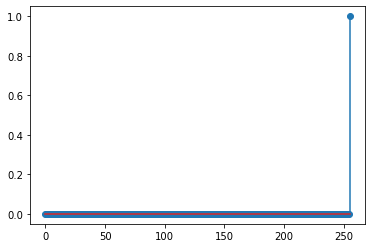

In [21]:
r2,c2=hist_plot(output_img)
plt.stem(r2,c2)

In [22]:
print(output_img.max(),output_img.min())

255.0 0.007781982421875
